In [1]:
import os
from pathlib import Path

import torch
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [2]:
from baard.utils.eval_utils import tpr_at_n_fpr, compute_roc_auc


In [3]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)


/home/lukec/workspace/baard_v4


In [4]:
def roc_demo(detector_name: str,
             path_results: str,
             data_name: str = 'MNIST',
             attack_name: str = 'APGD-Linf',
             eps: str = '0.22',
             ):
    """Plot ROC and show TPR@5FPR."""
    path_features = os.path.join(path_results, detector_name, attack_name)

    # Load clean
    if detector_name == 'MLLooDetector':
        _detector_name = 'MLLooDetector(proba)'
    else:
        _detector_name = detector_name
    filename_clean_feature = f'{_detector_name}-{data_name}-{attack_name}-clean'
    path_clean = os.path.join(path_features, f'{filename_clean_feature}.pt')
    features_clean = torch.load(path_clean)

    # Load adversarial examples
    filename_adv_feature = f'{_detector_name}-{data_name}-{attack_name}-{eps}'
    path_adv = os.path.join(path_features, f'{filename_adv_feature}.pt')
    features_adv = torch.load(path_adv)

    fpr, tpr, auc_score, thresholds = compute_roc_auc(features_clean, features_adv)
    tpr_at_fpr, _ = tpr_at_n_fpr(fpr, tpr, thresholds, n_fpr=0.05)

    fig, ax = plt.subplots(figsize=(4, 4))
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
    display.plot(ax=ax)
    plt.title(f'{detector_name} TPR@5FPR={tpr_at_fpr*100:.1f}%')
    plt.tight_layout()
    plt.show()


In [5]:
detector_list = [
    'ApplicabilityStage', 
    'ReliabilityStage', 
    'DecidabilityStage',
    'BAARD',
    'FeatureSqueezingDetector',
    'LIDDetector',
    'MLLooDetector',
    'OddsAreOddDetector',
    'PNDetector',
    'RegionBasedClassifier',
]
data_name = 'MNIST'

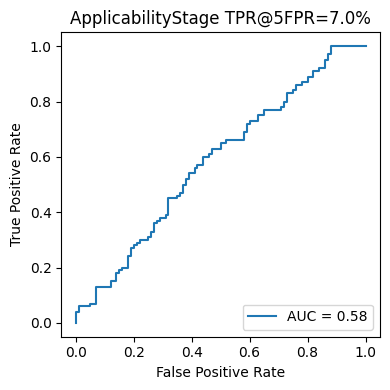

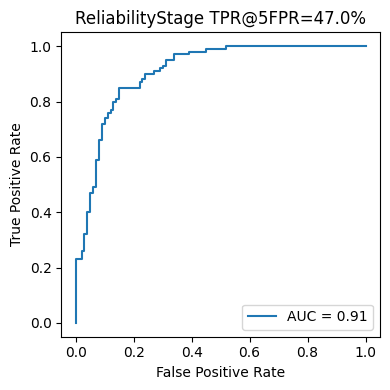

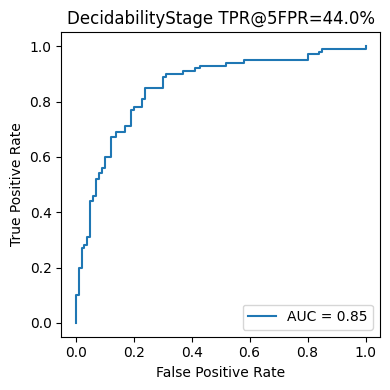

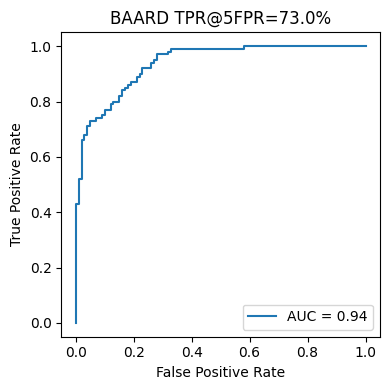

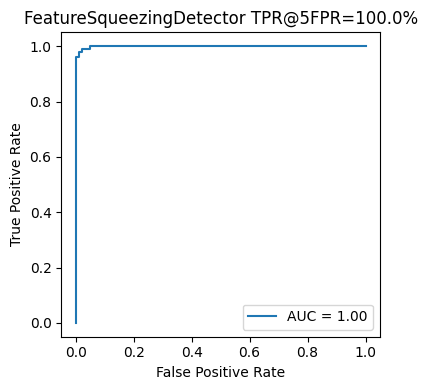

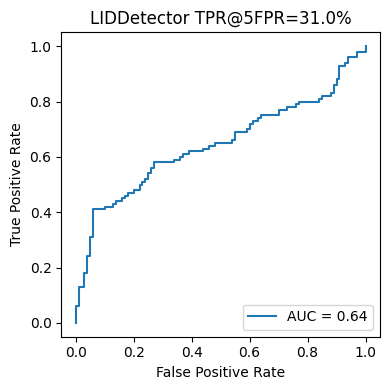

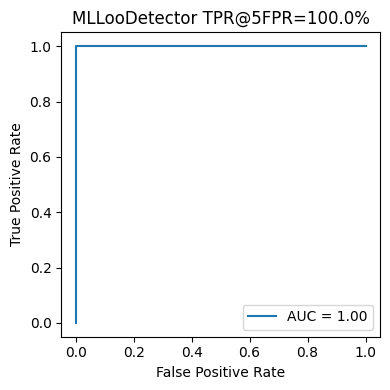

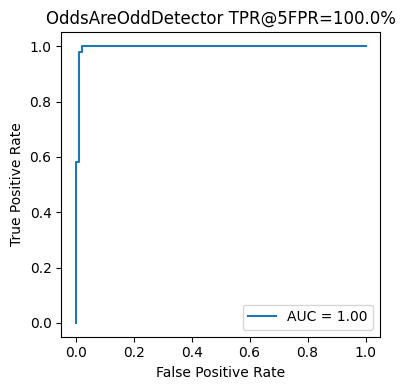

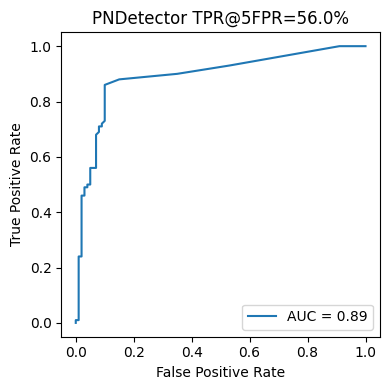

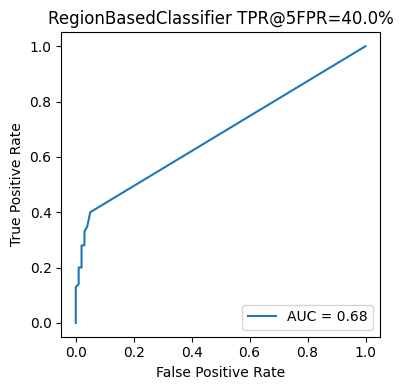

In [6]:
attack_name = 'APGD-Linf'
eps = '0.22'
path_results = os.path.join(PATH_ROOT, 'results', 'exp1234', data_name)
for detector_name in detector_list:
    roc_demo(detector_name, path_results, data_name, attack_name, eps)

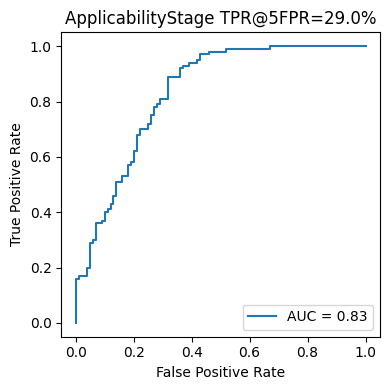

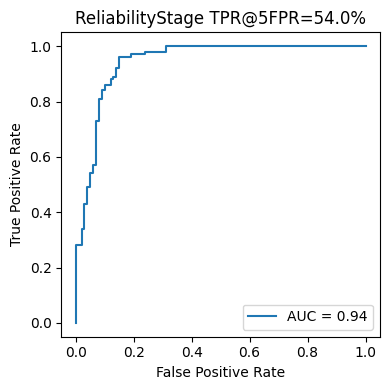

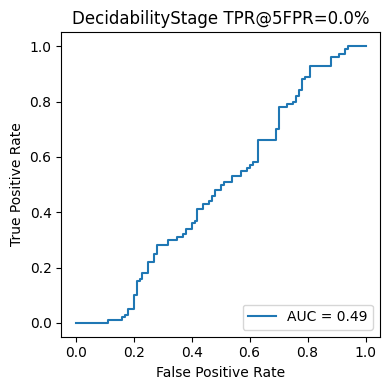

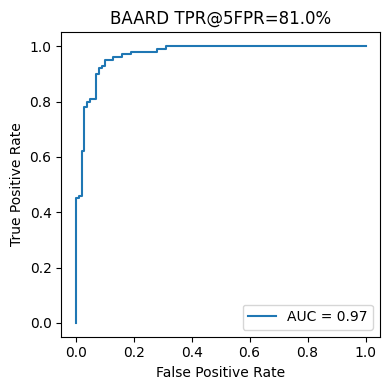

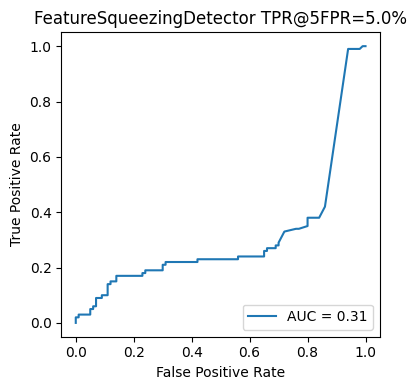

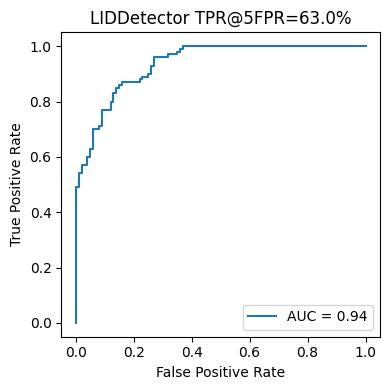

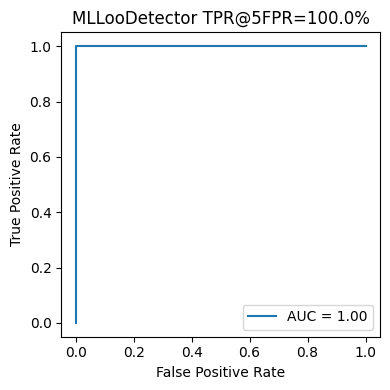

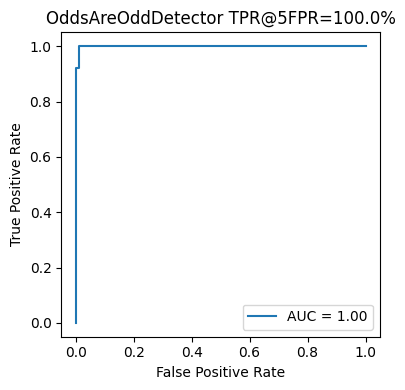

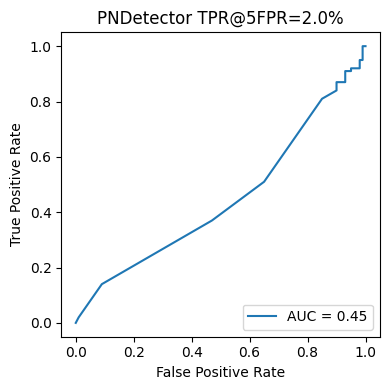

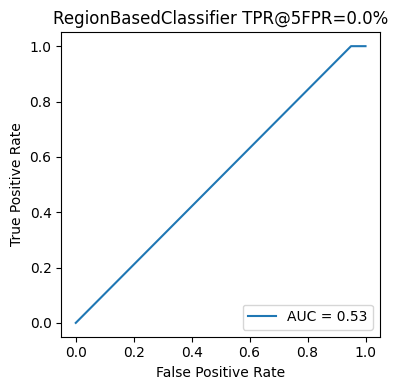

In [7]:
attack_name = 'APGD-Linf'
eps = '0.66'
path_results = os.path.join(PATH_ROOT, 'results', 'exp1234', data_name)
for detector_name in detector_list:
    roc_demo(detector_name, path_results, data_name, attack_name, eps)

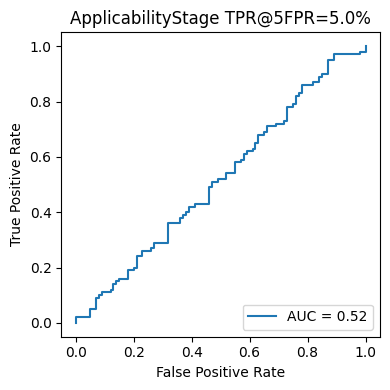

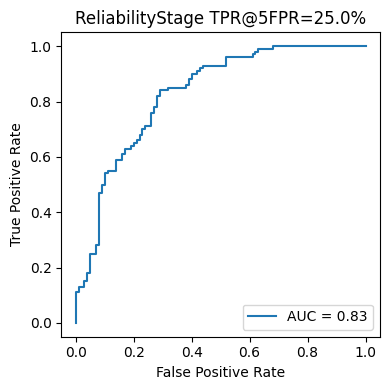

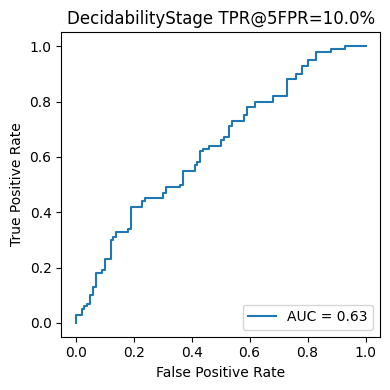

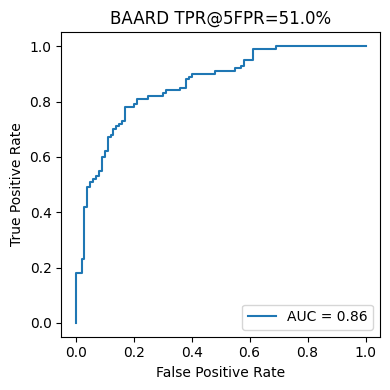

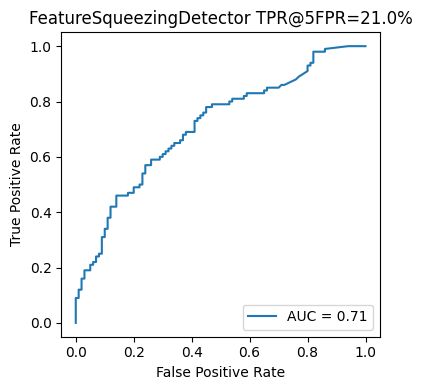

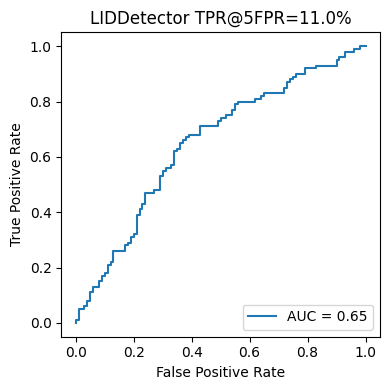

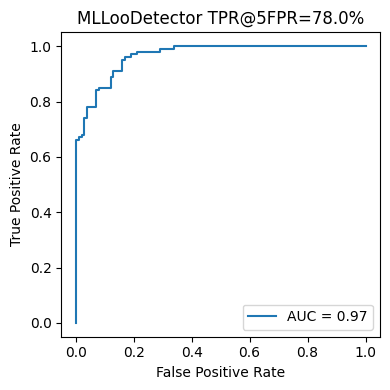

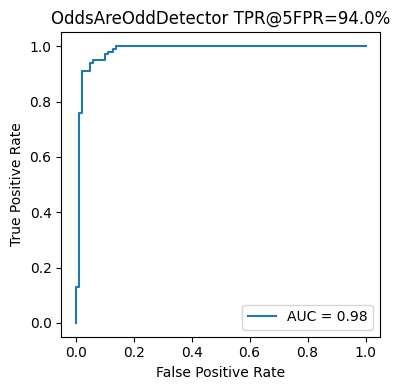

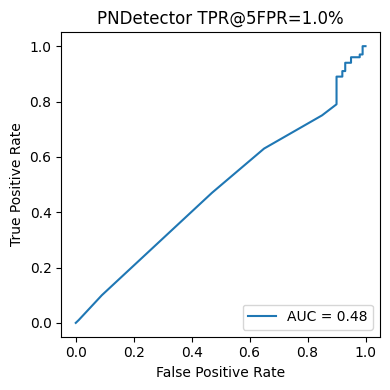

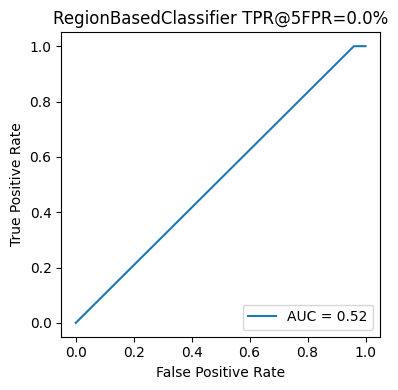

In [8]:
attack_name = 'APGD-L2'
eps = '4'
path_results = os.path.join(PATH_ROOT, 'results', 'exp1234', data_name)
for detector_name in detector_list:
    roc_demo(detector_name, path_results, data_name, attack_name, eps)

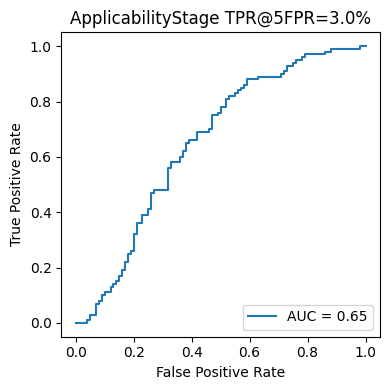

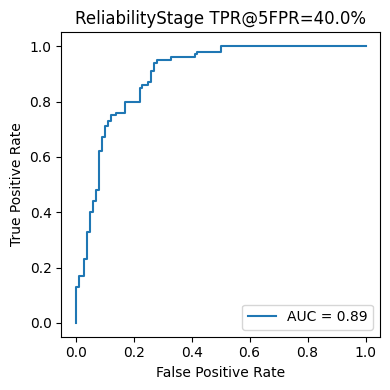

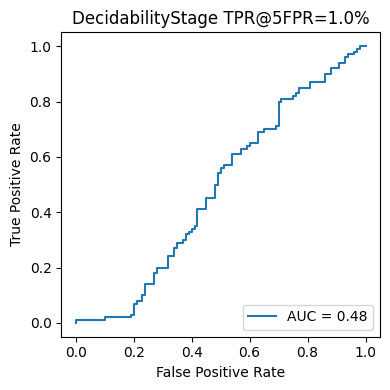

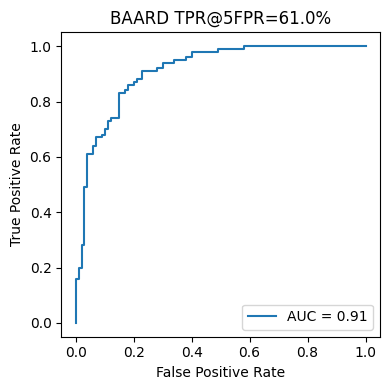

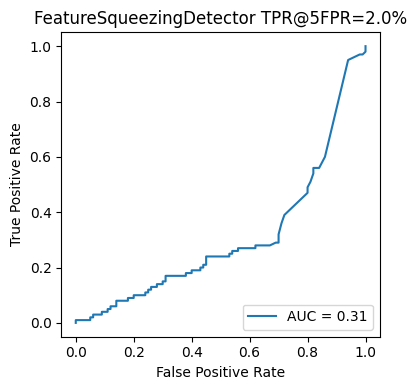

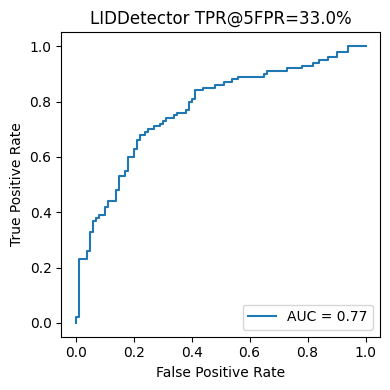

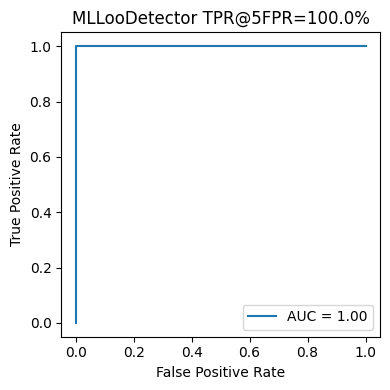

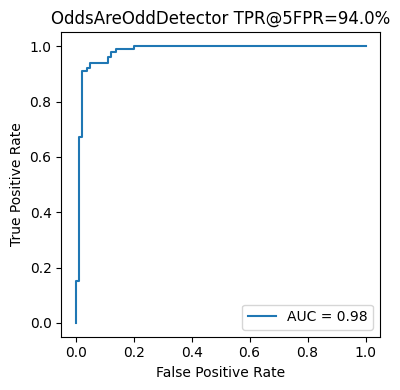

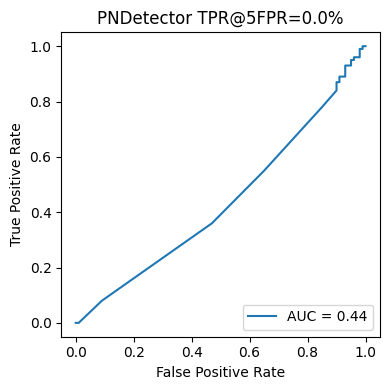

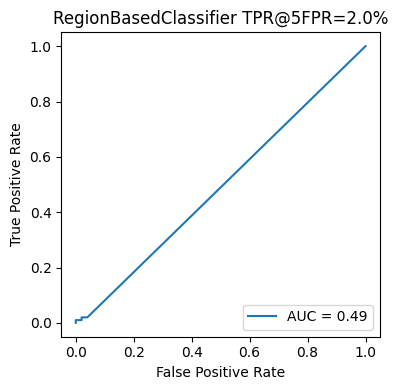

In [9]:
attack_name = 'APGD-L2'
eps = '8'
path_results = os.path.join(PATH_ROOT, 'results', 'exp1234', data_name)
for detector_name in detector_list:
    roc_demo(detector_name, path_results, data_name, attack_name, eps)